## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score



Reading the dataset into a DataFrame

In [2]:
df = pd.read_csv(r'CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df = df.fillna(0)

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df = pd.get_dummies(df)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

In [7]:
#from sklearn.preprocessing import StandardScaler
#X = pd.get_dummies(df)
#X
#scaler = StandardScaler()
#scaled_X = scaler.fit_transform(X)

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(scaled_df)
cluster_labels
len(scaled_df)
len(cluster_labels)
df['Cluster'] = cluster_labels


Choose the optimal K and calculate the silhouette score for the best model.

Text(0, 0.5, 'silhouette score')

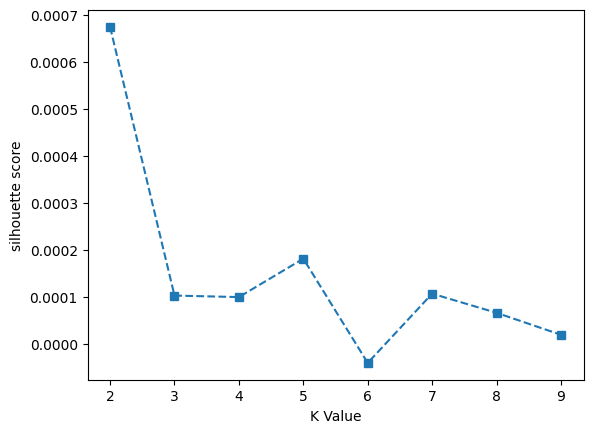

In [9]:


#ssd = []
silhouette_scores = []

for k in range(2,10):

    model = KMeans(n_clusters=k)

    model.fit(scaled_df)

    #Sum of squared distances of samples to their closest cluster center.
  #  ssd.append(model.inertia_)
    silhouette=silhouette_score(scaled_df,model.labels_)
    silhouette_scores.append(silhouette)



plt.figure()
plt.plot(range(2, 10), silhouette_scores, 's--')
plt.xlabel("K Value")
plt.ylabel("silhouette score")

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

s=[]
linkage_list=["average","single"]
affinity_list=["euclidean","manhattan","cosine"]
n=np.arange(2,10)
best=-1
best_affinity=" "
best_n=1
best_linkage= " "
for n_clusters in n:
    for affinity in affinity_list:
           for linkage in linkage_list:
                model = AgglomerativeClustering(n_clusters=n_clusters, metric=affinity, linkage=linkage)
                model = model.fit(df)
                silhouette=silhouette_score(df,model.labels_)#,metric='euclidean')
                s.append(silhouette)
                #print("Silhouette Score for number of clusters = "+ str(n_clusters)+ " "+str(affinity)+" and "+str(linkage)+" is "+str(silhouette)+".")
                if silhouette >= best:
                    best_n=n_clusters
                    best =silhouette
                    best_affinity=affinity
                    best_linkage=linkage
print("Best agglomerative clustering model for this data is number of clusters="+" " + str(best_n)+" " +"with linkage of "
      +str(best_linkage)+" and affinity of "+str(best_affinity)+"." "Silhouette Score is "+str(best)+".")

Choose the optimal K and calculate the silhouette score for the best model.

In [10]:
#storing the results of the previous code where we computed the best model and computed
#the silhouette score and the number of clusters, so we're storing the result by calling the AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
model = AgglomerativeClustering(n_clusters= 2, metric="euclidean", linkage = "complete")
cluster_labels = model.fit_predict(df)
cluster_labels
sil_score=silhouette_score(df, cluster_labels)
print("silhouette score:", sil_score)

silhouette score: 0.8125905934290168


In [11]:
#storing the results of the previous code where we computed the best model and computed
#the silhouette score and the number of clusters, so we're storing the result by calling the AgglomerativeClustering

model = AgglomerativeClustering(n_clusters= 2, metric="manhattan", linkage = "single")
cluster_labels = model.fit_predict(df)
cluster_labels
sil_score=silhouette_score(df, cluster_labels)
print("silhouette score:", sil_score)

silhouette score: 0.8643408373451434


In [12]:
#storing the results of the previous code where we computed the best model and computed
#the silhouette score and the number of clusters, so we're storing the result by calling the AgglomerativeClustering

#this shows that this model (euclidean + average) has a higher silhouette score (0.8861) than the first and second models
#this shows that using Euclidean distance with "average" linkage provides better cluster separation than Manhattan distance with "single" linkage
#or euclidean with 'complete', so it is likely the better clustering approach.

model = AgglomerativeClustering(n_clusters= 2, metric="euclidean", linkage = "average")
cluster_labels = model.fit_predict(df)
cluster_labels
sil_score=silhouette_score(df, cluster_labels)
print("silhouette score:", sil_score)

silhouette score: 0.8860611460614245


## DBSCAN

Find the optimal DBSCAN model.

In [8]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2)
cluster_labels = dbscan.fit_predict(df)
cluster_labels


array([-1, -1, -1, ..., -1, -1, -1])

In [9]:
outlier_percent = []

for eps in np.linspace(0.001,6,20):

    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(df)


    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)

    outlier_percent.append(perc_outliers)

KeyboardInterrupt: 

In [ ]:
sns.lineplot(x=np.linspace(0.001,6,20),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(df, cluster_labels)

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?